# Introduction to Python: Dataframes

**A Reproducible Research Workshop**

(A Collaboration between Dartmouth Library and Research Computing)

[*Click here to view or register for our current list of workshops*](http://dartgo.org/RRADworkshops)

*This notebook created by*:
+ Version 1.0: Jeremy Mikecz, Research Data Services (Dartmouth Library) drawing on some existing tutorials (cited below).
+ Version 2.0: ???
<!--
+ Some of the inspiration for the code and information in this notebook was taken from https://www.w3schools.com/python/python_intro.asp -- This is a great resource if you want to learn more about Python!-->

This is **Notebook 3** of 3 for the **Introduction to Text Analysis in Python** workshop:
+ Notebook 1: The Basics - getting started with Python
+ Notebook 2: Working with Texts (and other data) - importing, reviewing, and modifying texts and other data
+ **Notebook 3: Dataframes - importing texts and other data, placing this data into a dataframe, and then modifying, analyzing, visualizing, and exporting this data**

**Table of Contents**

1. Create a dataframe from scratch [creating a dataframe - option 1]
8. Read a dataframe from a csv [creating a dataframe - option 2]
9. working with a dataframe:
    + get summary data from a dataframe
    + access parts of a dataframe
    + subset, filter, and sort dataframe
    + modify a dataframe
    + split-apply-combine
4. data visualization - brief introduction to seaborn & matplotlib
5. iterate through text files and create a dataframe [creating a dataframe - option 3]

## Pythons and Dataframes

Nearly all researchers work with tabular data at one time or another. In this lesson, we will practice with **dataframes**, a Python data structure designed to work with tabular data, using the **Pandas library**. We will create our own dataframes, read in data from .csv files to a dataframe, subset and combine dataframes, and add or modify columns (variables) and observations (rows). We will also examine how these tasks work with messy and large datasets (i.e. millions or rows).

**Data tables, like Python dataframes, are often associated with quantitative or categorical data. However, text analysts often find dataframes useful for storing metadata from texts as well as full texts themselves and word lists for each document.**

To learn more about Pandas, visit the webpage for the [Pandas library](https://pandas.pydata.org/).

For further practice with Python and Pandas dataframes, visit:

1. Software Carpentries [Pandas DataFrames](http://swcarpentry.github.io/python-novice-novels/08-data-frames/index.html) lesson.
2. The **Pandas 1**, **Pandas 2**, and **Pandas 3** [tutorials offered by Constellate](https://constellate.org/tutorials).
3. Chapter 3, ["Data Analysis (Pandas)"](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/01-Pandas-Basics-Part1.html) in Melanie Walsh's *Introduction to Cultural Analytics & Python*.

Note: All three platforms above offer excellent lessons for learning how to perform various other tasks in Python. Check them out.

Finally, don't worry about memorizing all the functions and syntax needed to work with Pandas. You can use the [Python Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) as a handy guide to remind you of some of these key functions.


<h2 style="text-align:center;font-size:300%;">Dataframes: The Basics<h1> 
  <img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png" style="width:%40;">


A dataframe is a particular data structure that includes:
+ **rows** that record each observation of data
+ **columns** that record different attributes / measures / variables for each observation
+ **column labels** that describe the data recorded in each column
+ **index labels** that differentiate between each observations

## I. Create a dataframe

1. First, we need to import the [**Pandas**, Python's data analysis library](https://pandas.pydata.org/) that allows us to work with dataframes. It is almost universal practice among Python users to import Pandas under the name "pd" to serve as a useful abbreviation we can use when calling Pandas functions. 

In [71]:
import pandas as pd


2. There are many ways to create a dataframe:
    +  Perhaps the most common way is to **load an existing dataset saved as a *.csv*** (Comma Separated Values) file and read it in directly as a Pandas dataframe. We will introduce that method in the next section.
    +  **Import data from other files and convert it into a dataframe.** For example, you could write a Python script iterating over 1000s of text files and create a Pandas dataframe with basic information about each text (i.e. file names, number of words, etc.)
    + **We can also create a dataframe from scratch** (usually only used to demo or practice with dataframes.

**In the example below, we will create a dataframe from scratch** using data showing outcomes of the men's World Cup in recent decades.

In the previous notebook, we worked extensively with lists, which offer a simple way to store one-dimension series of data. Dataframes, however, allow us to store two-dimensional data in which we can store multiple attributes (columns) of data for each observation (row). We can think of dataframes, thus, as a list of lists.

In [72]:
#creating a dataframe from a list of dictionaries
# this example comes from Constellate's Pandas 1 tutorial
  ## https://lab.constellate.org/ilr-review-primary/notebooks/tdm-notebooks-2023-04-19T13%3A37%3A13.281Z/pandas-1.ipynb
wcup = pd.DataFrame({"Year": [2022, 
                              2018, 
                              2014, 
                              2010, 
                              2006, 
                              2002, 
                              1998, 
                              1994, 
                              1990,
                              1986], 
                     "Champion": ["Argentina", 
                                  "France", 
                                  "Germany", 
                                  "Spain", 
                                  "Italy", 
                                  "Brazil", 
                                  "France", 
                                  "Brazil", 
                                  "Germany", 
                                  "Argentina"], 
                     "Host": ["Qatar", 
                              "Russia", 
                              "Brazil", 
                              "South Africa", 
                              "Germany", 
                              "Korea/Japan", 
                              "France", 
                              "USA", 
                              "Italy", 
                              "Mexico"]
                    })

In [73]:
#another way to create a dataframe from the same data: using a list of lists (rows)
wcup_lists = [[2022, "Argentina", "Qatar"], [2018, "France", "Russia"], [2014, "Germany", "Brazil"]]
wcup2 = pd.DataFrame(wcup_lists, columns = ["Year", "Champion", "Host"])
wcup2.head()

,Year,Champion,Host
0,2022,Argentina,Qatar
1,2018,France,Russia
2,2014,Germany,Brazil


3. In the above example, we are directly inputting a dataframe using the Python **dictionary** data structure. For more on Python dictionaries [click here](https://www.w3schools.com/python/python_dictionaries.asp). 

*This is beyond the scope of this lesson, but if you are curious, you can learn more about Python dictionaries from [w3schools](https://www.w3schools.com/python/python_dictionaries.asp) or [GeeksforGeeks](https://www.geeksforgeeks.org/python-dictionary/)*

Let's view what the resulting dataframe looks like by typing the variable name we used to save our World Cup dataframe into memory:

In [74]:
wcup

,Year,Champion,Host
0,2022,Argentina,Qatar
1,2018,France,Russia
2,2014,Germany,Brazil
3,2010,Spain,South Africa
4,2006,Italy,Germany
5,2002,Brazil,Korea/Japan
6,1998,France,France
7,1994,Brazil,USA
8,1990,Germany,Italy
9,1986,Argentina,Mexico


We will come back to this dataset below.

## II. Subset a Data Frame

4. Let's take a look at our World Cup data again. Use the **.head()** method to output the first 5 rows of this dataset (wcup):

<code>df_name.head(n)</code><p>declaring <i>n</i> rows, default is 5</p>


In [75]:
wcup.tail()

,Year,Champion,Host
5,2002,Brazil,Korea/Japan
6,1998,France,France
7,1994,Brazil,USA
8,1990,Germany,Italy
9,1986,Argentina,Mexico


5. We can use the **.iloc[..., ...]** method to extract particular columns, rows, or cells. For example to retrieve the first row or first column, we would do the following:

`df_name.iloc[rowstnum:rowendnum, colstnum:colendnum]` 

In [76]:
wcup.iloc[0, 0]                                                                                

2022

6. How would you retrieve the value found in the 2nd row of the 2nd column?

In [77]:
wcup.iloc[1,1]  #remember the 1st item of a list or series in Python is number 0. Thus, the second item is number 1.

'France'

7. We can use **.loc[..., ...]** to retrieve values, columns, or rows by their labels. For example, if we wanted to retrieve all info from the "Champion" column, we would simply run:

`df_name.loc[rownames, colnames]`

In [78]:
wcup.loc[:,"Champion"]

0    Argentina
1       France
2      Germany
3        Spain
4        Italy
5       Brazil
6       France
7       Brazil
8      Germany
9    Argentina
Name: Champion, dtype: object

7b. To save a subsetted dataframe we need to assign it to a new name or replace the original df name.

In [79]:
wcup_last5 = wcup.iloc[:5,]
wcup_last5

,Year,Champion,Host
0,2022,Argentina,Qatar
1,2018,France,Russia
2,2014,Germany,Brazil
3,2010,Spain,South Africa
4,2006,Italy,Germany


*See Appendix I for more ways to access parts of a dataframe.*

## III. Read a Dataframe

Besides the basic Men's World Cup dataset created above, in this lesson we will also be working with:
 
+ a corpus of **450 novels written in English, French, and German**. This corpus was created by Andrew Piper of the **.txtlab** at McGill University ([documentation for this dataset is available here](https://txtlab.org/2016/01/txtlab450-a-data-set-of-multilingual-novels-for-teaching-and-research/)). This corpus includes separate files for each text and a summary csv with metadata for each.
+ the **Hollywood Film Dialogue dataset** (also used in Walsh. Original data from Hannah Anderson and Matt Daniels, ["Film Dialogue from 2,000 screenplays, Broken down by Gender and Age."](https://pudding.cool/2017/03/film-dialogue/))
<!--+ *one more complex and messy dataset*: a dataset containing **metadata for all New York Times articles for the month of April 2023** (including the title, a summary description, and the first paragraph of each article). This data was downloaded using the [New York Times Archive API](https://developer.nytimes.com/apis).-->


8. To read data in, we will use the Pandas [**read_csv** function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). First, however, we need to create a path to the folder where our datasets are saved. We will use the **Path** function from the **pathlib** library.

In [80]:
from pathlib import Path
Path.cwd()

WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/TAW')

In [81]:
# the command below uses .expanduser to indicate that "~" calls a user's home directory
novels_path = Path("~/shared/RR-workshop-data/text_corpora/novels").expanduser() 
list(novels_path.iterdir())

[WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/2_txtlab_Novel450'),
 WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/2_txtlab_Novel450.csv'),
 WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/info.txt'),
 WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/__MACOSX')]

In [82]:
list(Path(novels_path, "2_txtlab_Novel450").iterdir())

[WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/2_txtlab_Novel450/.DS_Store'),
 WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/2_txtlab_Novel450/DE_1771_La Roche,Sophievon_GeschichtedesFra╠êuleinsvonSternheim_Novel.txt'),
 WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/2_txtlab_Novel450/DE_1774_Goethe,Johann_DieLeidendesjungenWerthers1_Novel.txt'),
 WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/2_txtlab_Novel450/DE_1774_Wieland,ChristophMartin_GeschichtederAbderiten_Novel.txt'),
 WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/2_txtlab_Novel450/DE_1776_Nicolai,Friedrich_SebaldusNothanker_Novel.txt'),
 WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/2_txtlab_Novel450/DE_1779_Campe,Joachim_Robinson_Novel.txt'),
 WindowsPath('C:/Users/F0040RP/shared/RR-workshop-data/text_corpora/novels/2_txtlab_Novel450/DE_1779_Jacobi,Friedrich_Wo

9. Now we can read in the **novels dataset** using Pandas read_csv. function:

In [83]:
novels_df = pd.read_csv(Path(novels_path, "2_txtlab_Novel450.csv"))

10. We can print out this dataframe below in Jupyter Notebooks by simply typing the name of the dataframe (note: if you place any code below it, you need to wrap it in a **print()** command).

In [84]:
novels_df

,filename,id,language,date,author,title,gender,person,length
0,"DE_1771_La Roche,Sophievon_GeschichtedesFräul...",1,German,1771,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,female,first,99070
1,"DE_1774_Goethe,Johann_DieLeidendesjungenWerthe...",2,German,1774,"Goethe,Johann",DieLeidendesjungenWerthers1,male,first,34976
2,"DE_1774_Wieland,ChristophMartin_GeschichtederA...",3,German,1774,"Wieland,ChristophMartin",GeschichtederAbderiten,male,first,107398
3,"DE_1776_Nicolai,Friedrich_SebaldusNothanker_No...",4,German,1776,"Nicolai,Friedrich",SebaldusNothanker,male,third,122673
4,"DE_1779_Campe,Joachim_Robinson_Novel.txt",5,German,1779,"Campe,Joachim",Robinson,male,third,99439
...,...,...,...,...,...,...,...,...,...
445,"FR_1926_Giraudoux,Jean_Bella_Novel.txt",446,French,1926,"Giraudoux,Jean",Bella,male,first,47928
446,"FR_1926_Ramuz,CharlesFerdinand_GrandePeurDansl...",447,French,1926,"Ramuz,CharlesFerdinand",GrandePeurDanslaMontagne,male,first,49205
447,"FR_1927_Bernanos,Georges_Limposture_Novel.txt",448,French,1927,"Bernanos,Georges",Limposture,male,third,79206
448,"FR_1927_Duhamel,Georges_JournaldeSalavin_Novel...",449,French,1927,"Duhamel,Georges",JournaldeSalavin,male,first,41694


Here is a quick summary of what you see above from Melanie Walsh's online book, [*Introduction to Cultural Analytics & Python*](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/01-Pandas-Basics-Part1.html):

There are a few important things to note about the DataFrame displayed here:

+ Index
    - The bolded ascending numbers in the very left-hand column of the DataFrame is called the Pandas Index. You can select rows based on the Index.
    - By default, the Index is a sequence of numbers starting with zero. However, you can change the Index to something else, such as one of the columns in your dataset.

+ Truncation
    - The DataFrame is truncated, signaled by the ellipses in the middle ... of every column.
    - The DataFrame is truncated because we set our default display settings to 100 rows. Anything more than 100 rows will be truncated. To display all the rows, we would need to alter Pandas’ default display settings yet again.

+ Rows x Columns
    - Pandas reports how many rows and columns are in this dataset at the bottom of the output (n rows x n columns).
    - This is very useful!

*In addition, I would also add that in the preview of the dataframe above - at least as viewed within JHub - you can click on a pen/highlighter icon to view the whole dataframe.*


## IV. Get summary data to learn more about a dataframe

11. Now, often the first thing we want to do with a new dataset is to explore the size of the dataset and the type and range of data it contains. Run the following functions and then use hashtags ```#``` to add in comments about what each does.

````
dfname.head()
dfname.head(12)
dfname.tail()
dfname.shape()
dfname.info()
dfname.sample(10)
dfname.describe()
dfname.columns
dfname['colname'].describe()
dfname['colname'].value_counts()
```



In [85]:
novels_df.head() #what does the .head() method do to our dataframe?
                    ##explain: 

,filename,id,language,date,author,title,gender,person,length
0,"DE_1771_La Roche,Sophievon_GeschichtedesFräul...",1,German,1771,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,female,first,99070
1,"DE_1774_Goethe,Johann_DieLeidendesjungenWerthe...",2,German,1774,"Goethe,Johann",DieLeidendesjungenWerthers1,male,first,34976
2,"DE_1774_Wieland,ChristophMartin_GeschichtederA...",3,German,1774,"Wieland,ChristophMartin",GeschichtederAbderiten,male,first,107398
3,"DE_1776_Nicolai,Friedrich_SebaldusNothanker_No...",4,German,1776,"Nicolai,Friedrich",SebaldusNothanker,male,third,122673
4,"DE_1779_Campe,Joachim_Robinson_Novel.txt",5,German,1779,"Campe,Joachim",Robinson,male,third,99439


In [86]:
novels_df.head(12)  #

,filename,id,language,date,author,title,gender,person,length
0,"DE_1771_La Roche,Sophievon_GeschichtedesFräul...",1,German,1771,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,female,first,99070
1,"DE_1774_Goethe,Johann_DieLeidendesjungenWerthe...",2,German,1774,"Goethe,Johann",DieLeidendesjungenWerthers1,male,first,34976
2,"DE_1774_Wieland,ChristophMartin_GeschichtederA...",3,German,1774,"Wieland,ChristophMartin",GeschichtederAbderiten,male,first,107398
3,"DE_1776_Nicolai,Friedrich_SebaldusNothanker_No...",4,German,1776,"Nicolai,Friedrich",SebaldusNothanker,male,third,122673
4,"DE_1779_Campe,Joachim_Robinson_Novel.txt",5,German,1779,"Campe,Joachim",Robinson,male,third,99439
5,"DE_1779_Jacobi,Friedrich_Woldemar_Novel.txt",6,German,1779,"Jacobi,Friedrich",Woldemar,male,third,29039
6,"DE_1780_Wezel,Johann_HermannundUlrike_Novel.txt",7,German,1780,"Wezel,Johann",HermannundUlrike,male,third,258327
7,"DE_1785_Moritz,KarlPhilipp_AntonReiser_Novel.txt",8,German,1785,"Moritz,KarlPhilipp",AntonReiser,male,third,131762
8,"DE_1786_Moritz,KarlPhilipp_AndreasHartknopf_No...",9,German,1786,"Moritz,KarlPhilipp",AndreasHartknopf,male,third,24992
9,"DE_1787_Heinse,Johann_Ardinghello_Novel.txt",10,German,1787,"Heinse,Johann",Ardinghello,male,first,103097


In [87]:
novels_df.tail() #

,filename,id,language,date,author,title,gender,person,length
445,"FR_1926_Giraudoux,Jean_Bella_Novel.txt",446,French,1926,"Giraudoux,Jean",Bella,male,first,47928
446,"FR_1926_Ramuz,CharlesFerdinand_GrandePeurDansl...",447,French,1926,"Ramuz,CharlesFerdinand",GrandePeurDanslaMontagne,male,first,49205
447,"FR_1927_Bernanos,Georges_Limposture_Novel.txt",448,French,1927,"Bernanos,Georges",Limposture,male,third,79206
448,"FR_1927_Duhamel,Georges_JournaldeSalavin_Novel...",449,French,1927,"Duhamel,Georges",JournaldeSalavin,male,first,41694
449,"FR_1929_Dabit,Eugene_LhotelduNord_Novel.txt",450,French,1929,"Dabit,Eugene",LhotelduNord,male,third,35214


In [88]:
novels_df.shape #

(450, 9)

In [89]:
novels_df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  450 non-null    object
 1   id        450 non-null    int64 
 2   language  450 non-null    object
 3   date      450 non-null    int64 
 4   author    450 non-null    object
 5   title     450 non-null    object
 6   gender    450 non-null    object
 7   person    450 non-null    object
 8   length    450 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 31.8+ KB


In [90]:
novels_df.sample(10) #

,filename,id,language,date,author,title,gender,person,length
65,"DE_1829_Goethe,Johann_WilhelmMeistersWanderjah...",66,German,1829,"Goethe,Johann",WilhelmMeistersWanderjahre,male,third,135319
13,"DE_1789_Schiller,Friedrich_DerGeisterseher_Nov...",14,German,1789,"Schiller,Friedrich",DerGeisterseher,male,first,42166
360,"FR_1851_Murger,Henri_ScènesviedeBohème_Novel...",361,French,1851,"Murger,Henri",Scènes vie de Bohème,male,third,99647
192,"EN_1837_Trollope,FrancesMilton_TheVicarofWrexh...",193,English,1837,"Trollope,FrancesMilton",TheVicarofWrexham,female,third,168844
176,"EN_1814_Austen,Jane_MansfieldPark_Novel.txt",177,English,1814,"Austen,Jane",MansfieldPark,female,third,159529
341,"FR_1836_Gozlan,Leon_LeNotaireDeChantilly_Novel...",342,French,1836,"Gozlan,Leon",LeNotaireDeChantilly,male,third,108731
141,"DE_1914_Keyking,Elisabeth_Tschun_Novel.txt",142,German,1914,"Keyking,Elisabeth",Tschun,female,third,62781
128,"DE_1903_Frapan,Ilse_Arbeit_Novel.txt",129,German,1903,"Frapan,Ilse",Arbeit,female,third,75373
71,"DE_1836_Tieck,Ludwig_DerjungeTischlermeister_N...",72,German,1836,"Tieck,Ludwig",DerjungeTischlermeister,male,third,125594
351,FR_1842_Stendhal_Lamiel_Novel.txt,352,French,1842,Stendhal,Lamiel,male,first,55654


In [91]:
novels_df.describe() #

,id,date,length
count,450.000000,450.000000,450.000000
mean,225.500000,1854.871111,102070.844444
std,130.048068,43.643079,68107.851281
min,1.000000,1771.000000,13485.000000
25%,113.250000,1818.000000,51511.500000
50%,225.500000,1857.000000,81359.000000
75%,337.750000,1892.000000,136701.250000
max,450.000000,1932.000000,510455.000000


In [92]:
novels_df.columns

Index(['filename', 'id', 'language', 'date', 'author', 'title', 'gender',
       'person', 'length'],
      dtype='object')

In [93]:
## We can also get summary information about individual columns. For example:

novels_df['date'].describe()

count     450.000000
mean     1854.871111
std        43.643079
min      1771.000000
25%      1818.000000
50%      1857.000000
75%      1892.000000
max      1932.000000
Name: date, dtype: float64

In [94]:
## or:
novels_df['language'].value_counts()

language
German     150
English    150
French     150
Name: count, dtype: int64

<div class="alert alert-info" role="alert"><h3 style="color:blue;">Exercises for Parts III and IV</h3>

<p style="color:blue;">12. Take a look at the <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Python Pandas Cheat Sheet</a>. Are there any other summary data you would like to retrieve from this dataset. Try it below:</p></div>

<div class="alert alert-info" role="alert"><p style="color:blue;">13. Now let's open the Film Dialogue dataset. Copy and paste the code from Part III, Numbers 4 and 5 below and then modify that code to open the film dialogue dataset. (Navigate to the film-dialogue folder using the folder directory on the left. You will need to identify the specific file path to and file name of the film dataframe).</p>
</div>

In [95]:
film_path = Path("~/shared/RR-workshop-data/film-dialogue").expanduser() 
film_df = pd.read_csv(Path(film_path, "Pudding-Film-Dialogue-Clean.csv"))
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


\*\***A note about data entry and humans (and things like gender, race, class, etc.)**: When people collect data, they often have to reduce complex phenomena to individual categories. This is problematic when performed on objects that do not neatly fit into pre-existing categories (or any categories for that matter). This is especially problematic when assigned to humans. How do you reduce humans to a racial or ethnic category when those categories are, to at least some extent, social inventions? When a person comes from a mixed background? How do you reduce people to two gender categories, when many people do not feel they are adequately represented by such categories? Keep this in mind when reviewing datasets that place people into hard and fast categories (as the above dataset does for the gender of movie characters).

<div class="alert alert-info" role="alert" style="color:blue;"><p>Using some of the methods introduced in Part III and the [Python Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf), answer the following questions:</p>
<p>14. How many rows and columns are there in this dataset?</p>
</div>

In [96]:
film_df.shape

(23047, 9)

<div class="alert alert-info" role="alert" style="color:blue;"></p>
15. What are the range of dates for the films included in this dataset?
</p>
</div>

In [97]:
film_df.describe()

,release_year,words,proportion_of_dialogue,age,gross,script_id
count,23047.000000,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
mean,1998.132425,907.902634,0.086518,42.275052,106.735428,4194.804486
std,14.746052,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,1929.000000,101.000000,0.001537,3.000000,0.000000,280.000000
25%,1992.000000,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,2001.000000,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,2009.000000,980.000000,0.104171,50.000000,136.000000,6224.500000
max,2015.000000,28102.000000,0.923422,2009.000000,1798.000000,9254.000000


<div class="alert alert-info" role="alert" style="color:blue;">
<p>16. How many characters are identified as men or women (** - see note above) in this dataset</p>
</div>

In [98]:
film_df['gender'].value_counts()

gender
man      16131
woman     6911
?            5
Name: count, dtype: int64

<div class="alert alert-info" role="alert" style="color:blue;">
<p>17. What is the average age of film characters in this dataset?</p>
</div>

In [99]:
film_df['age'].describe()

count    18262.000000
mean        42.275052
std         57.912595
min          3.000000
25%         30.000000
50%         39.000000
75%         50.000000
max       2009.000000
Name: age, dtype: float64

In [100]:
# Access multiple columns
film_df[["title", "character", "age"]]

,title,character,age
0,The Bridges of Madison County,Betty,35.0
1,The Bridges of Madison County,Carolyn Johnson,NaN
2,The Bridges of Madison County,Eleanor,NaN
3,The Bridges of Madison County,Francesca Johns,46.0
4,The Bridges of Madison County,Madge,46.0
...,...,...,...
23042,Beauty and the Beast,Lumiere,56.0
23043,Beauty and the Beast,Maurice,71.0
23044,Beauty and the Beast,Monsieur D'Arqu,58.0
23045,Beauty and the Beast,Mrs. Potts,66.0


## V. Subset, Filter, and Sort a Dataframe - an Introduction

Frequently, when we are working with a dataset we may want to subset, filter, or sort the dataset before beginning your analysis.

Many of you may already be familiar with subsetting, filtering, and sorting datasets. But, just for review, this is what we mean by these terms:
+ **subset** - to subset a dataset is to create a smaller version of the dataset. For example, you may want to drop specific columns or rows to create a dataframe for your analysis

    <img src="https://pandas.pydata.org/docs/_images/03_subset_columns.svg" style="width:40%;">
    <img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg" style="width:40%;">
    
    + **filter** - filtering a dataframe is a specific type of subsetting. For example, you may want to drop all rows in a dataframe that contain missing values. Or keep only those rows that have a value that meets a particular condition.
+ **sort** - arrange the dataframe in a particular order. For example, you may want to sort a dataframe by a year or time column to arrange each row in chronological order. You may also sort a dataframe by multiple columns at once (i.e. sorting by year first and country second).
    <img src = "https://pythonexamples.org/images/python-pandas-dataframe-sort-by-index.svg" style = "width:40%">

Some examples of how you may want to subset, filter, or sort this lesson's dataframes: 

| Modification | World Cup dataset | novels dataset | Film Dialogue dataset |
| :- | :- | :- | :- |
| **subset / filter** | create a df including only the 21st century men's World Cup champions | only review data written in English **or** during a set range of years **or** in the first person | keep only "title", "gender", and "proportion_of_dialogue" columns **or** only include data for film dialogue spoken by a character over 50 years old  |
| **sort** | Sort dataframe by year, but this time in ascending order | sort dataframe by publication data and word length | sort df by proportion of dialogue |



In [101]:
novels_df.head(10)

,filename,id,language,date,author,title,gender,person,length
0,"DE_1771_La Roche,Sophievon_GeschichtedesFräul...",1,German,1771,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,female,first,99070
1,"DE_1774_Goethe,Johann_DieLeidendesjungenWerthe...",2,German,1774,"Goethe,Johann",DieLeidendesjungenWerthers1,male,first,34976
2,"DE_1774_Wieland,ChristophMartin_GeschichtederA...",3,German,1774,"Wieland,ChristophMartin",GeschichtederAbderiten,male,first,107398
3,"DE_1776_Nicolai,Friedrich_SebaldusNothanker_No...",4,German,1776,"Nicolai,Friedrich",SebaldusNothanker,male,third,122673
4,"DE_1779_Campe,Joachim_Robinson_Novel.txt",5,German,1779,"Campe,Joachim",Robinson,male,third,99439
5,"DE_1779_Jacobi,Friedrich_Woldemar_Novel.txt",6,German,1779,"Jacobi,Friedrich",Woldemar,male,third,29039
6,"DE_1780_Wezel,Johann_HermannundUlrike_Novel.txt",7,German,1780,"Wezel,Johann",HermannundUlrike,male,third,258327
7,"DE_1785_Moritz,KarlPhilipp_AntonReiser_Novel.txt",8,German,1785,"Moritz,KarlPhilipp",AntonReiser,male,third,131762
8,"DE_1786_Moritz,KarlPhilipp_AndreasHartknopf_No...",9,German,1786,"Moritz,KarlPhilipp",AndreasHartknopf,male,third,24992
9,"DE_1787_Heinse,Johann_Ardinghello_Novel.txt",10,German,1787,"Heinse,Johann",Ardinghello,male,first,103097


## VI. Filtering a dataframe by a condition

18. To filter a dataframe by a condition, the general procedure is:

`filt_df = df.loc[filter]`

First we need to define the filter itself:

In [102]:
novels_df['language'] == 'English'   #remember: "=" indicates an assignment and "==" indicates a comparison returning True if both sides are equal and False if not

0      False
1      False
2      False
3      False
4      False
       ...  
445    False
446    False
447    False
448    False
449    False
Name: language, Length: 450, dtype: bool

19. We can then assign this specific filter to a variable...

In [103]:
filt = (novels_df['language'] == 'English')

20. And use that filter to create a subset of our original dataset

In [104]:
novels_en = novels_df.loc[filt]
novels_en.tail()

,filename,id,language,date,author,title,gender,person,length
295,"EN_1922_Joyce,James_Ulysses_Novel.txt",296,English,1922,"Joyce,James",Ulysses,male,first,264170
296,"EN_1925_Woolf,Virginia_Mrs.Dalloway_Novel.txt",297,English,1925,"Woolf,Virginia",Mrs.Dalloway,female,third,63367
297,"EN_1927_Woolf,Virginia_TotheLighthouse_Novel.txt",298,English,1927,"Woolf,Virginia",TotheLighthouse,female,third,69276
298,"EN_1928_Woolf,Virginia_Orlando_Novel.txt",299,English,1928,"Woolf,Virginia",Orlando,female,third,78380
299,"EN_1930_Mansfield,Katherine_TheAloe_Novel.txt",300,English,1930,"Mansfield,Katherine",TheAloe,female,third,25870


21. We can also filter by multiple conditions:

In [105]:
years_filt = (novels_df['date'] >= 1890) & (novels_df['date'] < 1900)
novels1890s = novels_df.loc[years_filt]     #note: you cannot begin a variable name with a number, thus 90s_films would raise an error
print(novels1890s.head())
novels1890s.tail()

                                              filename   id language  date  \
114       DE_1890_Bahr,Hermann_DieguteSchule_Novel.txt  115   German  1890   
115  DE_1891_Fontane,Theodor_Unwiederbringlich_Nove...  116   German  1891   
116       DE_1892_Christen,Ada_JungferMutter_Novel.txt  117   German  1892   
117  DE_1892_Fontane,Theodor_FrauJennyTreibel_Novel...  118   German  1892   
118      DE_1895_Fontane,Theodor_EffieBriest_Novel.txt  119   German  1895   

              author              title  gender person  length  
114     Bahr,Hermann      DieguteSchule    male  third   52589  
115  Fontane,Theodor  Unwiederbringlich    male  third   81252  
116     Christen,Ada      JungferMutter  female  third   39228  
117  Fontane,Theodor   FrauJennyTreibel    male  third   59237  
118  Fontane,Theodor        EffieBriest    male  third   95331  


,filename,id,language,date,author,title,gender,person,length
422,"FR_1894_Renard,Jules_PoilDeCarrotte_Novel.txt",423,French,1894,"Renard,Jules",PoilDeCarrotte,male,third,32936
423,"FR_1896_Estaunie,Eduard_Lempreinte_Novel.txt",424,French,1896,"Estaunie,Eduard",Lempreinte,male,third,68747
424,"FR_1897_Bloy,Leon_LaFemmePauvre_Novel.txt",425,French,1897,"Bloy,Leon",LaFemmePauvre,male,third,89542
425,"FR_1897_France,Anatole_LormeduMail_Novel.txt",426,French,1897,"France,Anatole",LormeduMail,male,first,45623
426,"FR_1899_Vogue,Eugene_LesMortsQuiParlent_Novel.txt",427,French,1899,"Vogue,Eugene",LesMortsQuiParlent,male,third,97295


22. We can also combine multiple filters to create an even smaller and more specific subset:

In [106]:
en_filt = (novels_df['language'] == "English")
novels_en1890s = novels_df.loc[years_filt & en_filt]
novels_en1890s

,filename,id,language,date,author,title,gender,person,length
245,"EN_1890_Broughton,Rhoda_Alas!_Novel.txt",246,English,1890,"Broughton,Rhoda",Alas!,female,third,149365
246,"EN_1890_Chopin,Kate_AtFault_Novel.txt",247,English,1890,"Chopin,Kate",AtFault,female,third,57541
247,"EN_1890_Wilde,Oscar_ThePictureofDorianGray_Nov...",248,English,1890,"Wilde,Oscar",ThePictureofDorianGray,male,third,78887
248,"EN_1891_Doyle,ArthurConan_TheDoingsofRafflesHa...",249,English,1891,"Doyle,ArthurConan",TheDoingsofRafflesHaw,male,third,37939
249,"EN_1891_Gissing,George_NewGrubStreet_Novel.txt",250,English,1891,"Gissing,George",NewGrubStreet,male,third,185580
250,"EN_1891_Hardy,Thomas_TessoftheD'Urbervilles_No...",251,English,1891,"Hardy,Thomas",TessoftheD'Urbervilles,male,third,148451
251,"EN_1893_Gissing,George_TheOddWomen_Novel.txt",252,English,1893,"Gissing,George",TheOddWomen,male,third,138057
252,"EN_1893_Grand,Sarah_TheHeavenlyTwins_Novel.txt",253,English,1893,"Grand,Sarah",TheHeavenlyTwins,female,third,280635
253,"EN_1893_Harraden,Beatrice_ShipsThatPassintheNi...",254,English,1893,"Harraden,Beatrice",ShipsThatPassintheNight,female,third,37378
254,"EN_1894_Freeman,MaryWilkins_Pembroke_Novel.txt",255,English,1894,"Freeman,MaryWilkins",Pembroke,female,third,78862


<div class="alert alert-info" role="alert"><h3 style="color:blue;">Exercise for Part VII. Subsets and Filters</h3>

<p style="color:blue;">23. Filter and subset the film_df to create a new dataset with only films from <b>a decade of your choosing</b>.</p>
</div>

In [107]:
years_filt = (film_df['release_year'] >= 1970) & (film_df['release_year'] < 1980)
seventies_films = film_df.loc[years_filt] 
print(seventies_films.describe())  #we need a print() function to output this code b/c it is not the last line of code
seventies_films.head()  #as the last line of code in the cell, this will automatically output without a print() function

       release_year         words  proportion_of_dialogue         age  \
count   1109.000000   1109.000000             1109.000000  897.000000   
mean    1974.834986    796.813345                0.090813   41.498328   
std        2.913432   1179.070307                0.117219   12.664377   
min     1970.000000    101.000000                0.004202    8.000000   
25%     1972.000000    181.000000                0.021830   32.000000   
50%     1975.000000    355.000000                0.042990   40.000000   
75%     1977.000000    882.000000                0.101461   50.000000   
max     1979.000000  12487.000000                0.881086   88.000000   

             gross    script_id  
count   340.000000  1109.000000  
mean    424.252941  4563.658251  
std     388.399219  2470.472664  
min       6.000000   666.000000  
25%     148.500000  2328.000000  
50%     374.500000  4489.000000  
75%     559.750000  6958.000000  
max    1798.000000  8901.000000  


,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
196,American Graffiti,1973,Bob Falfa,man,248,0.025116,31.0,565.0,666
197,American Graffiti,1973,Budda,woman,226,0.022888,22.0,565.0,666
198,American Graffiti,1973,Carlos,man,131,0.013267,18.0,565.0,666
199,American Graffiti,1973,Carol,woman,729,0.073830,14.0,565.0,666
200,American Graffiti,1973,Curt,man,1240,0.125582,26.0,565.0,666


In [108]:
film_df['gross'].describe()

count    19386.000000
mean       106.735428
std        145.861933
min          0.000000
25%         22.000000
50%         56.000000
75%        136.000000
max       1798.000000
Name: gross, dtype: float64

<div class="alert alert-info" role="alert"><h3 style="color:blue;">Exercise for Part VI: Subsetting</h3>

<p style="color:blue;">24. Now, filter the Films dataframe by both two different columns of your choosing (i.e. years between 1990 and 2000 and gross revenue greater than $500 million).</p>
</div>

In [109]:
decade_filt = ((film_df['release_year'] >= 1990) & (film_df['release_year'] < 2000))
gross_filt = (film_df['gross'] >= 500)
#blockbusters90s = film_df[(decade_filt & gross_filt)]
blockbusters90s = film_df.loc[(decade_filt & gross_filt), :]


blockbusters90s

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
1224,Forrest Gump,1994,Abbie Hoffman,man,101,0.011111,34.0,686.0,921
1225,Forrest Gump,1994,Bubba Blue,man,475,0.052255,37.0,686.0,921
1226,Forrest Gump,1994,Drill Sergeant,man,129,0.014191,44.0,686.0,921
1227,Forrest Gump,1994,Forrest Gump,man,5446,0.599120,38.0,686.0,921
1228,Forrest Gump,1994,Hilary,woman,108,0.011881,38.0,686.0,921
...,...,...,...,...,...,...,...,...,...
18644,Home Alone,1990,Kate Mccalliste,woman,632,0.247649,36.0,588.0,7120
18645,Home Alone,1990,Kevin Mccallist,man,826,0.323668,10.0,588.0,7120
18646,Home Alone,1990,Linnie Mccallis,woman,125,0.048981,13.0,588.0,7120
18647,Home Alone,1990,Marv Merchants,man,406,0.159091,33.0,588.0,7120


## VII. Sorting a dataframe

25. We can sort a dataframe by the values in one column or in multiple columns using the **.sort_values()** method.

In [110]:
novels_df.sort_values(by = 'date')
novels_df.sort_values(by = 'date', ascending = False)
novels_df.sort_values(by = ['date', 'language', 'length'], ascending = [True, True, False])

,filename,id,language,date,author,title,gender,person,length
151,"EN_1771_Smollett,Tobias_TheExpedictionofHenryC...",152,English,1771,"Smollett,Tobias",TheExpedictionofHenryClinker,male,first,148261
150,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel.txt",151,English,1771,"Mackenzie,Henry",TheManofFeeling,male,first,36458
300,"FR_1771_Dorat,ClaudeJoseph_LesSacrificesDeLAmo...",301,French,1771,"Dorat,ClaudeJoseph",LesSacrificesDeLAmour,male,first,68295
0,"DE_1771_La Roche,Sophievon_GeschichtedesFräul...",1,German,1771,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,female,first,99070
301,"FR_1772_Arnaud,FrancoisThomasMariedeBaculardd'...",302,French,1772,"Arnaud,FrancoisThomasMariedeBaculardd'",EpreuvesDuSentiment,male,third,199419
...,...,...,...,...,...,...,...,...,...
298,"EN_1928_Woolf,Virginia_Orlando_Novel.txt",299,English,1928,"Woolf,Virginia",Orlando,female,third,78380
449,"FR_1929_Dabit,Eugene_LhotelduNord_Novel.txt",450,French,1929,"Dabit,Eugene",LhotelduNord,male,third,35214
299,"EN_1930_Mansfield,Katherine_TheAloe_Novel.txt",300,English,1930,"Mansfield,Katherine",TheAloe,female,third,25870
148,"DE_1930_Roth,Joseph_Hiob_Novel.txt",149,German,1930,"Roth,Joseph",Hiob,male,third,50299


<div class="alert alert-info" role="alert"><h3 style="color:blue;">Exercise for Part VII. Sorting</h3>

<p style="color:blue;">26. Sort the films dataframe by two columns of your choosing</p></div>

In [111]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


In [112]:
film_df.sort_values(by = ['gender', 'proportion_of_dialogue'], ascending = [True, False])

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7325,The Hebrew Hammer,2003,Tiny Tim,?,488,0.033720,NaN,NaN,2510
18811,Hatchet III,2013,Randy,?,167,0.033024,NaN,NaN,7177
16901,Battle of the Year,2013,Thomas Hergenro,?,216,0.019626,NaN,9.0,6053
8010,JFK,1991,Himself - Walki,?,312,0.005303,90.0,145.0,2682
8011,JFK,1991,Himself - With,?,224,0.003807,78.0,145.0,2682
...,...,...,...,...,...,...,...,...,...
8035,JFK,1991,Virginia Garris,woman,134,0.002278,NaN,145.0,2682
5257,Casino,1995,Amy Rothstein (,woman,130,0.001921,NaN,84.0,1963
5258,Casino,1995,Anna Scott,woman,124,0.001832,NaN,84.0,1963
5262,Casino,1995,Cashier,woman,114,0.001684,NaN,84.0,1963


## VII. Split-Apply-Combine

<img src = "https://www.oreilly.com/api/v2/epubs/9781783985128/files/graphics/5128OS_09_01.jpg" style="width:40%">

A commonly used data analysis strategy is **split-apply-combine**:
+ **split** the problem / data into manageable pieces
+ **apply** some calculations or analysis to the pieces
+ **combine** the parts back into a whole

For computational data science this means (from [Python Pandas documentation](https://pandas.pydata.org/docs/user_guide/groupby.html)):
```
    * Splitting the data into groups based on some criteria
    * Applying a function to each group independently
    * Combining the results into a data structure
```

Let's examine how this strategy may work for the datasets we have been working with. In our novels dataset, for example, we may want to explore larger trends at the continent level. So we could:
+ **split** the overall dataset by continent, creating separate Africa, Asia, North America, South America, Oceania, and Europe datasets.
+ **apply** some calculations to each continental dataset; i.e. What is the average GDP and life expectancy of each continent in different years? Or what has been the average rate of change in these values from one five year interval to the next?
+ **combine** the data back together to compare changes in productivity (as measured by GDP) and health (as measured by life expectancy) by continent and over time.

Different applications apply this strategy in different ways. In Excel, you would use pivot tables, SQL the "group by" operator, and in R you may use the plyr package.

With Pandas, we can use the **.groupby()**, **.agg()**, and **.apply()** functions to do this. 
+ **.groupby()** - *splits* a dataset into separate groups
+ **.agg()** - used to calculate multiple statistics per group in one calculation
+ **.apply()** - applies a function across an entire column (or row) in a Pandas dataframe 

Let's re-examine the contents of our novels dataframe. 

27. Use the .head() method to output its first five rows and use the .columns method to output summary information about this dataframe.

In [113]:
novels_df.head()

,filename,id,language,date,author,title,gender,person,length
0,"DE_1771_La Roche,Sophievon_GeschichtedesFräul...",1,German,1771,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,female,first,99070
1,"DE_1774_Goethe,Johann_DieLeidendesjungenWerthe...",2,German,1774,"Goethe,Johann",DieLeidendesjungenWerthers1,male,first,34976
2,"DE_1774_Wieland,ChristophMartin_GeschichtederA...",3,German,1774,"Wieland,ChristophMartin",GeschichtederAbderiten,male,first,107398
3,"DE_1776_Nicolai,Friedrich_SebaldusNothanker_No...",4,German,1776,"Nicolai,Friedrich",SebaldusNothanker,male,third,122673
4,"DE_1779_Campe,Joachim_Robinson_Novel.txt",5,German,1779,"Campe,Joachim",Robinson,male,third,99439


In [114]:
novels_df.columns

Index(['filename', 'id', 'language', 'date', 'author', 'title', 'gender',
       'person', 'length'],
      dtype='object')

### VIIb: Groupby()

*This first few cells of this section are adapted from Constellate's [3rd Pandas tutorial](https://lab.constellate.org/practical-diabetes-methods/notebooks/tdm-notebooks-2023-04-20T12%3A35%3A07.477Z/pandas-3.ipynb).*

28. Groupby is a powerful function built into Pandas that you can use to summarize your data. Groupby splits the data into different groups on a variable of your choice. 

To learn more about using Pandas **.groupby()** to split-apply-combine data, see the [documentation here](https://pandas.pydata.org/docs/user_guide/groupby.html).

In [115]:
# Create a series storing the number of documents in each doc type by year
novels_df.groupby('language').size()

language
English    150
French     150
German     150
dtype: int64

In [116]:
novels_df.groupby(['person', 'gender']).size()

person  gender
first   female     42
        male      108
third   female    121
        male      179
dtype: int64

In [117]:
novels_df.groupby(['language', 'person']).size()

language  person
English   first      43
          third     107
French    first      67
          third      83
German    first      40
          third     110
dtype: int64

### VIIc. agg()

We can then use the **.agg()** (aggregate) method to choose what functions we will **apply** to each group to allow us to **combine** the data back together.

The general formula for applying functions using the aggregate (.agg()) method:

```
df_name.groupby('col_name').agg({dict assigning a function to each column we want to aggregate})

```
where the format for each dictionary is as follows:
```
{'name_of_col1_to_keep': 'function_to_apply_to_this_col', 'name_of_col2_to_keep': 'function_to_apply_to_this_col'}
```

Some commonly used functions with groupby ([click here](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#computations-descriptive-stats) for a full list):
+ .count(), .mean(), .min(), .max(), .sum()

31. With this in mind, examine the following line of code. What do you guess it does? Run it and see if you were correct?

In [118]:
novels_df.groupby('language').agg({'length':'mean'})

,length
language,
English,123225.193333
French,86680.546667
German,96306.793333


32. We can use the .agg() method to apply multiple functions to multiple columns:

In [119]:
novels_df.groupby(['language', 'gender']).agg({'length':'mean'})

length
language gender               
English  female  126716.231884
         male    120251.345679
French   female   84549.500000
         male     87046.820312
German   female   80402.513889
         male    110987.666667

## VIId. .apply() ????

## VIII. Creating Basic Visualizations

We can create simple data visualizations using the **Seaborn** library (which is built on the **matplotlib** library).

<Axes: xlabel='length', ylabel='language'>

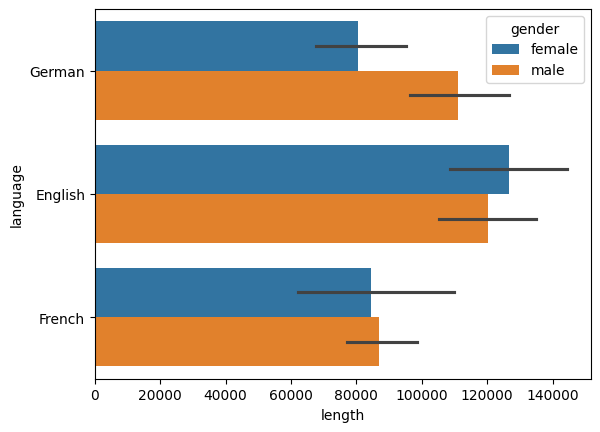

In [120]:
import seaborn as sns
sns.barplot(novels_df,  x = "length", y = "language", hue = 'gender')

<Axes: xlabel='language', ylabel='length'>

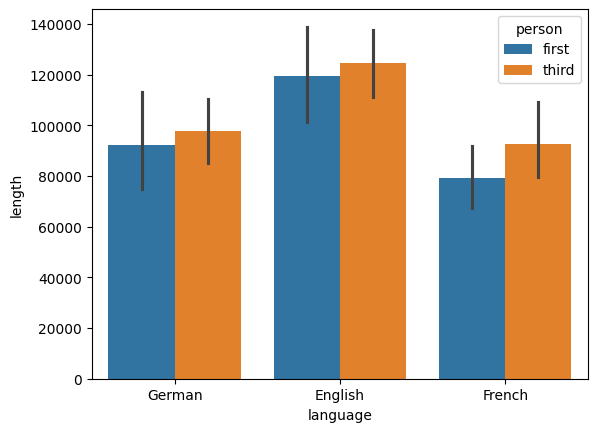

In [121]:
sns.barplot(novels_df, x = "language", y = "length", hue = "person")

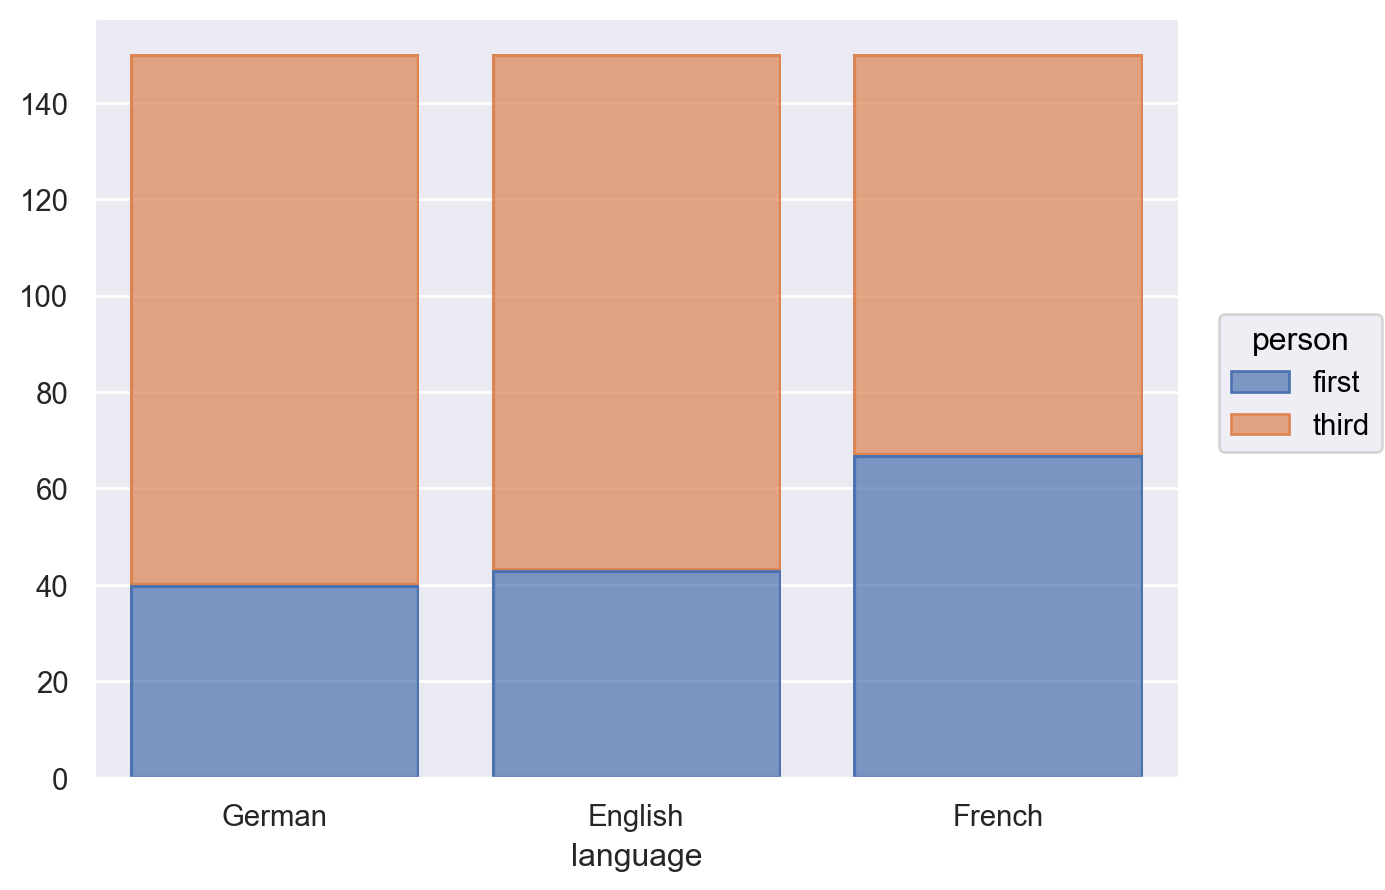

In [122]:
import seaborn.objects as so

so.Plot(novels_df, x = "language", color = "person").add(so.Bar(), so.Count(), so.Stack())

<Axes: xlabel='date', ylabel='language'>

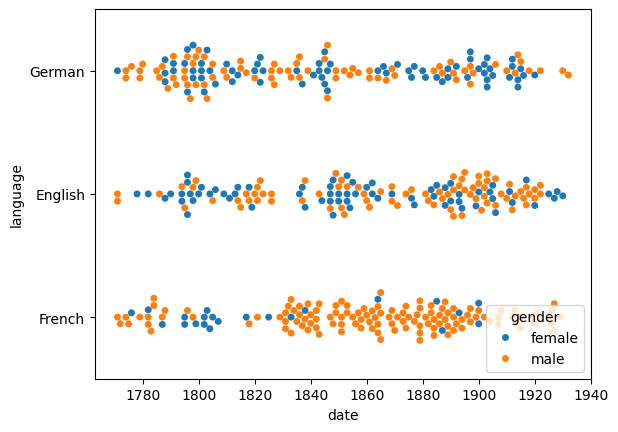

In [123]:
sns.swarmplot(novels_df, x = "date", y = "language", hue = "gender") #"person"

<div class="alert alert-info" role="alert" style="color:blue;"><h3>Exercises Part VIII: Split-Apply-Combine</h3>
<p>33. Now, using what we've learned in this lesson, let's answer the question: What films from each decade had the highest gross while having a female character who had the most dialogue in the film?</p> 

<p> Note: the methods we learned in this session may not be sufficient. Feel free to search online for additional help. The key to effective searches is using the correct words to describe what you are trying to do, such as "python dataframe subset max value from each group".</p>

<p><i>Alternatively, you can try the same with a character over 60 years old, for example.</i></p>

<p>First, identify the steps we will need to do to answer this question in the text cell below:</p>


</div>

Steps:
1. ...
2. 

In [124]:
film_df['decade'] = film_df['release_year'] // 10 * 10
film_df

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id,decade
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280,1990
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280,1990
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280,1990
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280,1990
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280,1990
...,...,...,...,...,...,...,...,...,...,...
23042,Beauty and the Beast,1991,Lumiere,man,1063,0.104636,56.0,452.0,9254,1990
23043,Beauty and the Beast,1991,Maurice,man,1107,0.108967,71.0,452.0,9254,1990
23044,Beauty and the Beast,1991,Monsieur D'Arqu,man,114,0.011222,58.0,452.0,9254,1990
23045,Beauty and the Beast,1991,Mrs. Potts,woman,564,0.055517,66.0,452.0,9254,1990


In [125]:
#https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby
#idx = film_df.groupby(['title'])['proportion_of_dialogue'].transform(max) == film_df['proportion_of_dialogue']
#film_mainspeaker = film_df.loc[idx, :]
print(film_df.shape)
main_spkr = film_df.loc[film_df.groupby(['title'])['proportion_of_dialogue'].idxmax()]
main_spkr.shape

(23047, 10)


(1994, 10)

In [126]:
main_spkr.groupby(['decade', 'gender']).size()

decade  gender
1920    man         1
1930    man        12
        woman       3
1940    man        19
        woman       4
1950    man        21
        woman       2
1960    man        20
        woman       3
1970    man        90
        woman      10
1980    man       179
        woman      45
1990    man       389
        woman      99
2000    man       491
        woman     149
2010    man       339
        woman     118
dtype: int64

In [127]:
fem_spkr = main_spkr.loc[(main_spkr['gender'] == "woman"), :]
fem_spkr.shape
        

(433, 10)

In [128]:
fem_spkr.sort_values(by = ['decade', 'gross'], ascending = [False, False])

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id,decade
20829,The Hunger Games,2012,Katniss Everdee,woman,2605,0.310156,22.0,445.0,8029,2010
6725,Frozen,2013,Anna,woman,2397,0.352656,27.0,429.0,2343,2010
19363,American Sniper,2014,Taya,woman,1183,0.292677,33.0,372.0,7413,2010
11875,Alice in Wonderland,2010,Alice Kingsleig,woman,2040,0.377918,21.0,368.0,3816,2010
16120,Inside Out,2015,Joy,woman,2805,0.372411,44.0,367.0,5424,2010
...,...,...,...,...,...,...,...,...,...,...
12479,The Curse of the Cat People,1944,Amy Reed,woman,1821,0.186980,8.0,NaN,4064,1940
14811,The Seventh Victim,1943,Mary Gibson,woman,2341,0.193823,21.0,NaN,4940,1940
3520,The Wizard of Oz,1939,Dorothy,woman,3060,0.325983,17.0,839.0,1483,1930
14141,Mystery of the Wax Museum,1933,Florence Dempse,woman,3110,0.316668,32.0,NaN,4677,1930


In [129]:
#subset so only top gross earner from each decade appears!!

## IX. Reading multiple text files into a dataframe (if time allows or save for next session)

34. We already experimented with two common ways to create a dataframe: creating one from scratch and reading a csv into a dataframe.

For text analysis, however, we often collections of texts stored in plain text files (.txt). Sometimes it is sufficient to loop through and open all plain text files every time we need to process or analyze them.

However, if we plan to return to the same corpus or collections of texts regularly, it usually makes sense to stores the full texts and various processed versions of those same texts (i.e. divided into lists of words and punctuation known as "tokens") into a dataframe. The code below iterates through 200+ U.S. Presidential State of the Union addresses and creates a dataframe storing the president, year, number of tokens, fulltext, and a list of tokens for each speech.

In [130]:
import glob
sotudir = Path("~/shared/RR-workshop-data/state-of-the-union-dataset/txt").expanduser() 
pathlist = sorted(sotudir.glob('*.txt'))
txtlist = []
for path in pathlist:
    nameparts = path.stem.split("_")
    pres = nameparts[0]
    year = nameparts[1]
    with open(path, encoding = 'utf-8') as f:
        txt = f.read()
    tokens = txt.split()
    numtoks = len(tokens)
    txtlist.append([pres, year, numtoks, txt, tokens])
colnames=['pres','year','numtoks','fulltext', 'tokens']
sotudf=pd.DataFrame(txtlist, columns=colnames)
sotudf = sotudf.sort_values(by = "year")
sotudf.head()


,pres,year,numtoks,fulltext,tokens
218,Washington,1790,1085,"Fellow Citizens of the Senate, and House of Re...","[Fellow, Citizens, of, the, Senate,, and, Hous..."
219,Washington,1791,2303,Fellow-Citizens of the Senate and House of Rep...,"[Fellow-Citizens, of, the, Senate, and, House,..."
220,Washington,1792,2098,Fellow-Citizens of the Senate and House of Rep...,"[Fellow-Citizens, of, the, Senate, and, House,..."
221,Washington,1793,1965,Fellow-Citizens of the Senate and House of Rep...,"[Fellow-Citizens, of, the, Senate, and, House,..."
222,Washington,1794,2915,Fellow-Citizens of the Senate and House of Rep...,"[Fellow-Citizens, of, the, Senate, and, House,..."


## Appendix I: Other ways to access parts of a dataframe

8. At the moment, rows are only indexed by numbers ("0", "1", "2" and so on). However, we can convert out "Year" column into an index:

`newdf = df.set_index("colname")`

In [131]:
wcup = wcup.set_index("Year")


9. Output the head of this dataframe (`df.head()`). Notice the slight change (The lower placement of "Year" indicates it is now an index rather than a column):

In [132]:
wcup.head(3)

,Champion,Host
Year,,
2022,Argentina,Qatar
2018,France,Russia
2014,Germany,Brazil


10. Now we can search the dataframe by our index ("Year") and by column name. For example:

In [133]:
wcup.loc[1994, "Champion"]

'Brazil'

In [134]:
wcup.loc[2022:2010, 'Champion']

Year
2022    Argentina
2018       France
2014      Germany
2010        Spain
Name: Champion, dtype: object

**Note: for the code above, our index ("Year") has integers not strings. So running:*

```
wcup.loc["1994", "Champion"]
```

*will produce an error. Since 1994 is considered an integer here, we should leave the quotes out.*

11. Like many things in Python, there are often multiple ways to accomplish the same goal. For example, we can also select particular columns by simply placing the names of a column within brackets (similar to indexing and slicing lists in Python).

In [135]:
# Use bracket notation to access the column 'Champion'
wcup['Champion']

Year
2022    Argentina
2018       France
2014      Germany
2010        Spain
2006        Italy
2002       Brazil
1998       France
1994       Brazil
1990      Germany
1986    Argentina
Name: Champion, dtype: object

## Appendix II: Subsetting Dataframes by dropping specific columns or rows

14. We can drop specific columns using the **.drop()** method for Pandas dataframes. For example, if we want to drop the "Host" column from our World Cup dataset, we could run the following:

In [136]:
print(novels_df.shape)
print(novels_df.columns)
novels_df2 = novels_df.drop(columns = ['filename', 'id'])  #note: we need to add "wcup2 =" to save the changes to our original wcup dataframe as "wcup2"
                                    ##you could also just replace the original "wcup" by writing wcup = wcup.drop(...)
                                    ## however, often it is helpful to keep both the original, full dataframe and the smaller, subsetted one
print(novels_df2.shape)
print(novels_df2.columns)

(450, 9)
Index(['filename', 'id', 'language', 'date', 'author', 'title', 'gender',
       'person', 'length'],
      dtype='object')
(450, 7)
Index(['language', 'date', 'author', 'title', 'gender', 'person', 'length'], dtype='object')


There are many different ways to drop specific columns or rows using .drop(). See the [Pandas 2 Constellate lesson](https://lab.constellate.org/monist-language/notebooks/tdm-notebooks-2023-04-19T18%3A59%3A16.317Z/pandas-2.ipynb) for some additional examples.

15. Commonly, for example, we may want to drop observations (rows) containing null data (warning: you should always consider what this removal does to the representative nature of your dataset!). We can use the **.dropna()** method. See some examples below:

In [137]:
print(film_df.shape)
film_df_no_nas = film_df.dropna()
print(film_df_no_nas.shape)

(23047, 10)
(15552, 10)


15b. Temporarily or permanently changing a dataframe: Most methods in Python just temporarily change a dataframe unless you assign the modified dataframe to a variable. For example:

```
film_df.dropna()
```
just outputs a version of film_df with all NAs and null values removed, but does not save it to memory. If we wanted to replace the original "film_df" we can simply assign it the same name as follows:

```
film_df = film_df.dropna()
```
Or we can save it under a new name as we did above:
```
film_df_no_nas = film_df.dropna()
```

Finally, we can also use the "inplace" argument to do the same:

```
film_df.dropna(inplace = True)
```



15c. You can also drop columns with missing values (this is much rarer than dropping rows with missing values):

In [138]:
film_df_dropcols = film_df.dropna(axis = 1)    #for Pandas, rows are axis 0 and columns are axis 1
#film_df_dropcols = film_df.dropna(axis = "columns") # this does the same thing! 

15d. More commonly, you may want to remove rows that are missing values for specific columns. For example, if you want to analyze the age of characters / actors given speaking roles in films, you would want to remove any characters (rows) for which we lack age data.

In [139]:
print(film_df.shape)
film_df_age = film_df.dropna(subset = "age")
film_df_age

(23047, 10)


,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id,decade
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280,1990
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280,1990
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280,1990
5,The Bridges of Madison County,1995,Michael Johnson,man,723,0.113075,38.0,142.0,280,1990
6,The Bridges of Madison County,1995,Robert Kincaid,man,1908,0.298405,65.0,142.0,280,1990
...,...,...,...,...,...,...,...,...,...,...
23042,Beauty and the Beast,1991,Lumiere,man,1063,0.104636,56.0,452.0,9254,1990
23043,Beauty and the Beast,1991,Maurice,man,1107,0.108967,71.0,452.0,9254,1990
23044,Beauty and the Beast,1991,Monsieur D'Arqu,man,114,0.011222,58.0,452.0,9254,1990
23045,Beauty and the Beast,1991,Mrs. Potts,woman,564,0.055517,66.0,452.0,9254,1990
